In [5]:
%%time
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}


Toggle code

FileNotFoundError: [Errno 2] No such file or directory: '..\\BES_analysis_data\\W19_only\\[].zip'

Wall time: 17.4 ms


In [6]:
mpd = pd.read_csv("C:\\Users\\Gamer\\Downloads\\MPDataset_MPDS2021a.csv")

In [7]:
mpd["countryname"].value_counts()

Denmark                       245
Israel                        227
Belgium                       184
Italy                         179
Netherlands                   178
Spain                         173
Finland                       162
Switzerland                   158
Sweden                        137
Norway                        130
Japan                         123
Iceland                       117
France                        116
Portugal                      111
Australia                     111
Ireland                       103
Mexico                        103
New Zealand                   101
United Kingdom                 98
Germany                        95
Canada                         94
Austria                        88
Serbia                         87
Greece                         84
Croatia                        84
Turkey                         77
Luxembourg                     75
North Macedonia                74
Poland                         73
Slovenia      

In [48]:
lab_party = (mpd["partyabbrev"]=="Labour")&(mpd["countryname"]=="United Kingdom")
con_party = (mpd["partyabbrev"]=="Conservatives")&(mpd["countryname"]=="United Kingdom")
ld_party = (mpd["partyabbrev"]=="LibDems")&(mpd["countryname"]=="United Kingdom")
snp_party = (mpd["partyabbrev"]=="SNP")&(mpd["countryname"]=="United Kingdom")

In [10]:
# Economy (State <-> Market): (per401 + per402 + per407 + per414 + per505) - (per403 + per404 + per405 + per406 + per409 + per412 + per413 + per415 + per416 + per504)
# Society (Progressive <-> Conservative): (per104 + per109 + per601 + per603 + per605 + per608) - (per105 + per106 + per107 + per501 + per503 + per602 + per604 + per607 + per705)

In [46]:
mpd[(mpd["countryname"]=="United Kingdom")]["partyabbrev"].value_counts()

Conservatives    21
Labour           21
LibDems           8
SNP               6
DUP               6
SF                5
UUP               4
UKIP              3
GPEW              3
PC                3
SDP               2
SDLP              2
Alliance          1
Name: partyabbrev, dtype: int64

In [12]:
mpd[mpd.columns[0:20]]

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,coderid,manual,coderyear,testresult,testeditsim,pervote,voteest,presvote,absseat,totseats
0,11,Sweden,0,0,17/09/1944,194409,11220,Communist Party of Sweden,SKP,20,117,0,1983.0,NaN,NaN,10.300,0.0,NaN,15.0,230.0
1,11,Sweden,0,0,17/09/1944,194409,11320,Social Democratic Labour Party,SAP,30,117,0,1983.0,NaN,NaN,46.500,0.0,NaN,115.0,230.0
2,11,Sweden,0,0,17/09/1944,194409,11420,People’s Party,FP,40,117,0,1983.0,NaN,NaN,12.900,0.0,NaN,26.0,230.0
3,11,Sweden,0,0,17/09/1944,194409,11620,Right Party,NaN,60,117,0,1983.0,NaN,NaN,15.800,0.0,NaN,39.0,230.0
4,11,Sweden,0,0,17/09/1944,194409,11810,Agrarian Party,NaN,80,117,0,1983.0,NaN,NaN,13.600,0.0,NaN,35.0,230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,181,South Africa,0,0,08/05/2019,201905,181510,African Christian Democratic Party,ACDP,50,310,5,2021.0,0.838,0.659,0.839,0.0,NaN,4.0,400.0
4735,181,South Africa,0,0,08/05/2019,201905,181520,African Transformation Movement,ATM,50,310,5,2021.0,0.838,0.659,0.441,0.0,NaN,2.0,400.0
4736,181,South Africa,0,0,08/05/2019,201905,181710,Freedom Front Plus,FF+,70,310,5,2021.0,0.838,0.659,2.379,0.0,NaN,10.0,400.0
4737,181,South Africa,0,0,08/05/2019,201905,181910,Inkatha Freedom Party,IFP,90,310,5,2021.0,0.838,0.659,3.377,0.0,NaN,14.0,400.0


In [41]:
def get_year(x):
    x=str(x)
    if x=="197402":
        return "74F"
    elif x=="197410":
        return "74O"
    else:
        return x[2:4]
mpd["ge"] =mpd["date"].apply(get_year)     

In [15]:
mpd["Economic State-Market"] = mpd[["per401","per402","per407","per414","per505",]].sum(axis=1) - mpd[["per403","per404","per405","per406","per409","per412","per413","per415","per416","per504",]].sum(axis=1)
mpd["Society Progressive-Conservative"] = mpd[["per104","per109","per601","per603","per605","per608"]].sum(axis=1) - mpd[["per105","per106","per107","per501","per503","per602","per604","per607","per705",]].sum(axis=1)
mpd["Society Conservative-Progressive"] = -mpd["Society Progressive-Conservative"]

In [31]:
left_vars = ["per403","per404","per405","per409","per412",
            "per413","per415","per503","per504","per506",
            "per701","per705","per706"]
right_vars = ["per303","per401","per402","per414",
              "per505","per507","per702","per704",]
lib_vars = ["per201","per202","per602","per604","per607",]   
auth_vars = ["per305","per601","per603","per605","per608",]

mpd["Economic State-Market(Bale-Webb)"] = mpd[right_vars].sum(axis=1) - mpd[left_vars].sum(axis=1)
mpd["Society Conservative-Progressive(Bale-Webb)"] =  mpd[lib_vars].sum(axis=1) - mpd[auth_vars].sum(axis=1)


In [246]:
right_vars = ["per401","per402","per303","per414","per702"]
left_vars = ["per413","per412","per701","per404","per409","per403"]
lib_vars = ["per503","per504"]
auth_vars = ["per605","per603"]

mpd["Economic State-Market(Richards)"] = mpd[right_vars].sum(axis=1) - mpd[left_vars].sum(axis=1)
mpd["Society Conservative-Progressive(Richards)"] =  mpd[lib_vars].sum(axis=1) - mpd[auth_vars].sum(axis=1)


In [32]:
# Paul Webb's Ec Left-Right

# Left-wing’ statements include the following variables in the Comparative Manifestos Data set:
# Per403 - Need for market regulation;
# Per404 - Need for economic planning;
# Per405 - Need for corporatism;
# Per409 - Need for Keynesian demand management;
# Per412 - General need for direct government control of economy;

# Per413 - Need for nationalization of industry;
# Per415 - Positive references to Marxist analysis;
# Per503 - References to social justice & equality;
# Per504 - Favourable mentions of welfare state expansion;
# Per506 - Need to increase educational spending;

# Per701 - Positive references to labour groups;
# Per705 - Positive references to underprivileged minorities;
# Per706 - Positive references to assistance for non-economic minorities and groups.

# ‘Right-wing’ statements include:
# Per303 - Need for efficiency & economy in government;
# Per401 - Positive references to free enterprise;
# Per402 - Need for incentives;
# Per414 - Need for traditional economic orthodoxy;

# Per505 - Need to limit spending on welfare state;
# Per507 - Need to limit educational spending;
# Per702 - Negative references to labour groups;
# Per704 - Positive references to middle class or professional groups.   

In [28]:
# The Liberty-Authority dimension scores are generated by subtracting the percentage of authoritarian statements in a manifesto from the percentage of libertarian statements. Thus, a positive figure represents a net liberal position.
# Libertarian statements include:
# Per201 (positive references to personal freedom and human rights);
# Per202 (positive references to democracy and political participation);
# Per602 (negative references towards the national way of life);
# Per604 (negative references towards traditional morality);
# Per607 (positive references to multiculturalism).


# Authoritarian statements include:
# Per305 (need for political authority and strong government);
# Per601 (positive references to the national way of life);
# Per603 (positive references to traditional morality);
# Per605 (positive references to strong law and order);
# Per608 (negative references to multiculturalism).

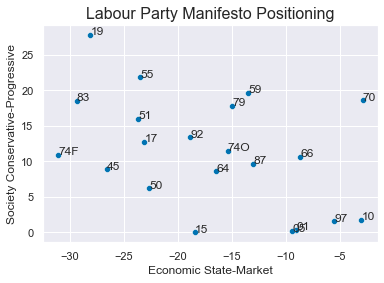

In [42]:
x = "Economic State-Market"
y = "Society Conservative-Progressive"
ax = sns.scatterplot(data = mpd[lab_party],x=x,y=y)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(mpd.loc[lab_party,x], mpd.loc[lab_party,y], mpd.loc[lab_party,"ge"], plt.gca())
plt.title("Labour Party Manifesto Positioning",fontsize=16);

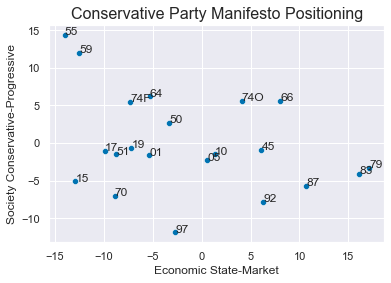

In [43]:
x = "Economic State-Market"
y = "Society Conservative-Progressive"
ax = sns.scatterplot(data = mpd[con_party],x=x,y=y)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(mpd.loc[con_party,x], mpd.loc[con_party,y], mpd.loc[con_party,"ge"], plt.gca())
plt.title("Conservative Party Manifesto Positioning",fontsize=16);

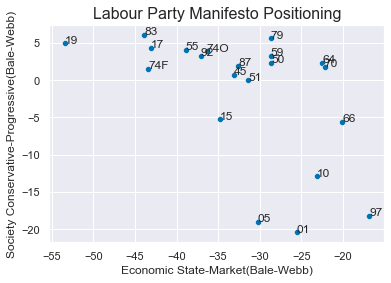

In [44]:
x = "Economic State-Market(Bale-Webb)"
y = "Society Conservative-Progressive(Bale-Webb)"
ax = sns.scatterplot(data = mpd[lab_party],x=x,y=y)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(mpd.loc[lab_party,x], mpd.loc[lab_party,y], mpd.loc[lab_party,"ge"], plt.gca())
plt.title("Labour Party Manifesto Positioning",fontsize=16);

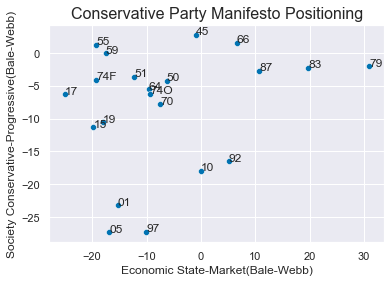

In [45]:
x = "Economic State-Market(Bale-Webb)"
y = "Society Conservative-Progressive(Bale-Webb)"
party = con_party
ax = sns.scatterplot(data = mpd[party],x=x,y=y)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(mpd.loc[party,x], mpd.loc[party,y], mpd.loc[party,"ge"], plt.gca())
plt.title("Conservative Party Manifesto Positioning",fontsize=16);

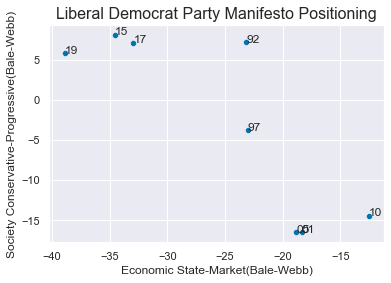

In [49]:
x = "Economic State-Market(Bale-Webb)"
y = "Society Conservative-Progressive(Bale-Webb)"
party = ld_party
ax = sns.scatterplot(data = mpd[party],x=x,y=y)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(mpd.loc[party,x], mpd.loc[party,y], mpd.loc[party,"ge"], plt.gca())
plt.title("Liberal Democrat Party Manifesto Positioning",fontsize=16);

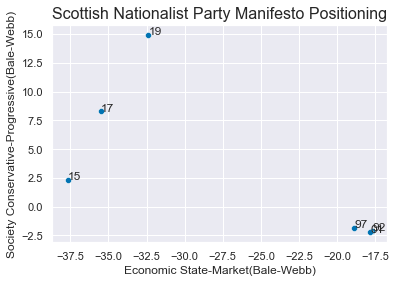

In [50]:
x = "Economic State-Market(Bale-Webb)"
y = "Society Conservative-Progressive(Bale-Webb)"
party = snp_party
ax = sns.scatterplot(data = mpd[party],x=x,y=y)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(mpd.loc[party,x], mpd.loc[party,y], mpd.loc[party,"ge"], plt.gca())
plt.title("Scottish Nationalist Party Manifesto Positioning",fontsize=16);

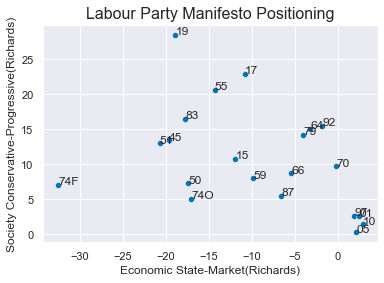

In [247]:
x = "Economic State-Market(Richards)"
y = "Society Conservative-Progressive(Richards)"
party = lab_party
ax = sns.scatterplot(data = mpd[party],x=x,y=y)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(mpd.loc[party,x], mpd.loc[party,y], mpd.loc[party,"ge"], plt.gca())
plt.title("Labour Party Manifesto Positioning",fontsize=16);

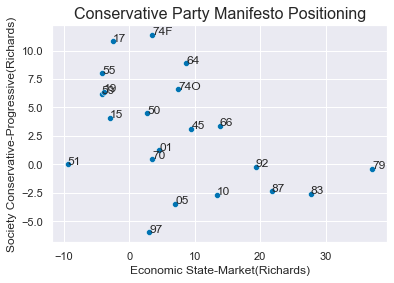

In [248]:
x = "Economic State-Market(Richards)"
y = "Society Conservative-Progressive(Richards)"
party = con_party
ax = sns.scatterplot(data = mpd[party],x=x,y=y)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(mpd.loc[party,x], mpd.loc[party,y], mpd.loc[party,"ge"], plt.gca())
plt.title("Conservative Party Manifesto Positioning",fontsize=16);

In [ ]:
# * Argument looks less compelling for Labour when you add in 45-59
# * Argument looks *much* less compelling when you try the same thing for the Conservatives
#    * Can you really argue for an electorate-driven effect which just happens to be assymmetric?
#    * ... maybe but not very compellingly
#    * seems easier to argue for different internal party dynamics
#    e.g. in 79 and 97 both internal parties were "ready for a change"
#    but the rule was not automatically "move towards the electorate"
#    (note, because of surprise 1970 win, Cons only out of power for 9 years instead of 16)

In [ ]:
## TO DO
# Graphically:
# Add arrows
# Add symbol for govt/opp and majority size
# add majorities (manual - quicker than finding a non-manual source!)

# add lib dems (and snp) DONE

# do factor analysis/variants to try to find 'better' manifesto two dimensions

In [237]:
low_noise_list = \
["per605","per603", # law&order+,traditional morality+
 "per504","per413","per409","per404", # pro-ec left
 "per412","per403", # price controls/min wage & market regulation
 "per701", # pro-unions/labour groups
 "per402","per401","per414", # pro-ec right
 "per702","per703","per704", # anti-unions/labour groups & pro agriculture & middle class and prof groups
 "per303","per411", # efficiency savings/infrastructure spending? Is this left-right or just fluff?
 "per503","per506", # equality, education

#   "per305","per301", # political authority, decentralisation
#  "per416", # anti-growth economy/pro-sustainability (environmental/social???)
#  "per706", # non-economic demographic groups (not relating to equality/welfare)
 
#  "per106","per101","per108","per104","per103",#peace/foreign special rel +/europe+/military+/anti-imperialism
]

low_noise_list.remove("per411")
low_noise_list.remove("per704")
low_noise_list.remove("per703")

In [238]:
dataset_folder = "E:\\Users\\Gamer\\Documents\\GitHub\\Thomas Prosser project\\datasets\\"
Manifesto_Project_Dataset_version_2019b = "MPDataset_MPDS2019b_stata14.dta"
variable_labels = pd.read_pickle(dataset_folder+Manifesto_Project_Dataset_version_2019b.replace(".dta","_variable_labels.zip"),compression='zip')

Treatment = "Manifesto Project Decomposition"
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"
output_subfolder = output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [239]:
# GB_parties = ['Conservatives', 'Labour', 'LibDems', 'SNP', 'UKIP',
#        'GPEW', 'PC', 'SDP']
GB_parties = ['Conservatives', 'Labour'
       ]
mask = (mpd["countryname"]=="United Kingdom") & (mpd["partyabbrev"].apply(lambda x: x in GB_parties))

In [240]:
# pd.Series(MCP_vals.columns).tail(50)

In [241]:
value_vars = [x for x in mpd.columns if re.match("per(\d+)",x)]
# rile, planeco, markeco, welfare, intpeace
MCP_vals = mpd[low_noise_list][mask]
# MCP_vals = MCP_vals.fillna(MCP_vals.mean())
MCP_vals = MCP_vals.dropna(axis=1)
# df["peruncod"]
# percentage uncoded
MCP_vals.columns = [variable_labels.loc[x]+"("+x.replace("per","")+")" for x in MCP_vals.columns]
# # MCP_vals.columns
MCP_vals = MCP_vals.drop_duplicates()
MCP_vals.drop(MCP_vals.columns[MCP_vals.var()<.5],axis=1,inplace=True)

In [242]:
decomp_index = MCP_vals.index
decomp_columns = MCP_vals.columns
clean_feature_set_std = StandardScaler().fit_transform(MCP_vals.values )
decomp_std = pd.DataFrame(   clean_feature_set_std,
                             columns = MCP_vals.columns,
                             index   = MCP_vals.index      )

In [233]:
# MCP_vals

In [243]:
%%time
# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = decomp_std.shape[1]
n_components = 3
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
decomp = SparsePCA(n_components=n_components, alpha=1,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

# decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(decomp_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = decomp_index)


[dict_learning] .

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


........................

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]

.............................

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using ba

......
Wall time: 1.15 s


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Don

In [114]:
import pickle
# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
#     if not os.path.exists(subdir): os.makedirs(subdir)
#     with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
#     BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
#     decomp_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
# else: # LOAD decomp results (default is SAVE)
#     decomp_method = load_suff
#     subdir = output_subfolder + os.sep + decomp_method    
#     fname = subdir + os.sep + decomp_method
#     if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
#     # load decomp object, BES_decomp, BES_std, n_components
#     with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
#     BES_decomp = pd.read_hdf(fname+".hdf")
#     decomp_std    = pd.read_hdf(fname+"_std"+".hdf")
#     n_components = decomp.components_.shape[0] 

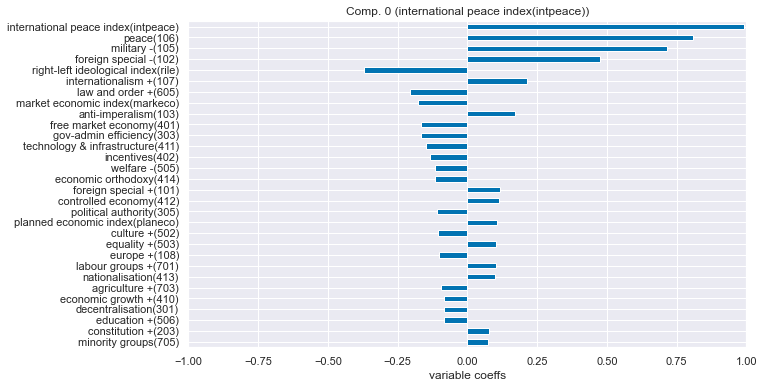

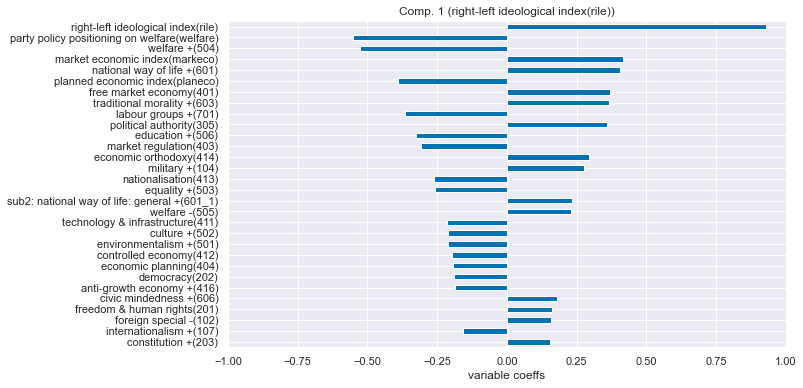

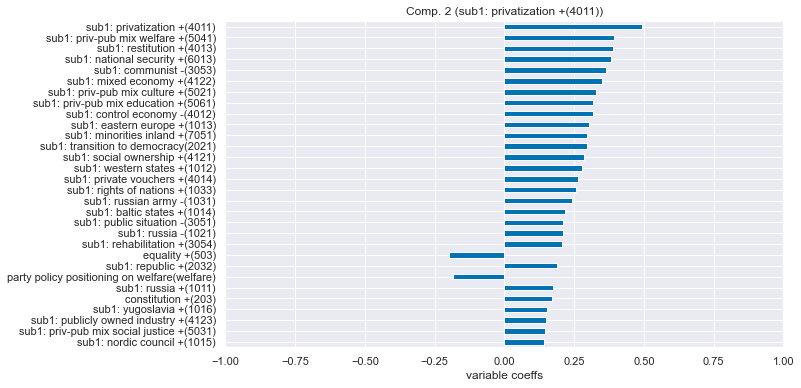

In [67]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)

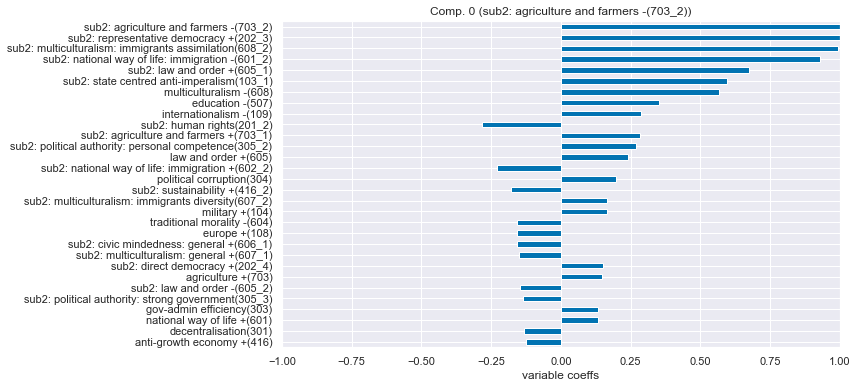

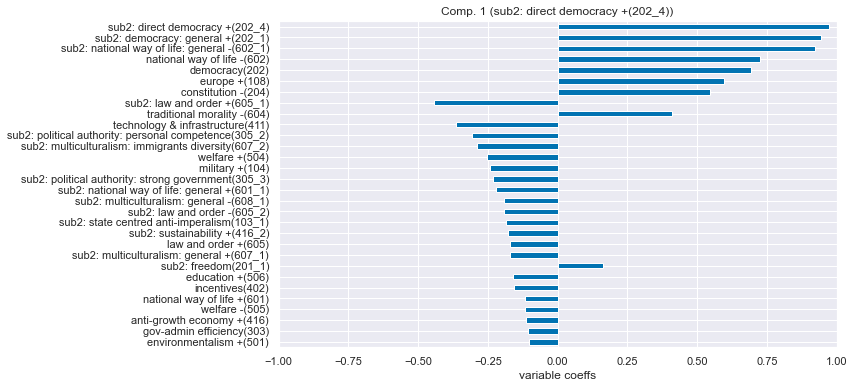

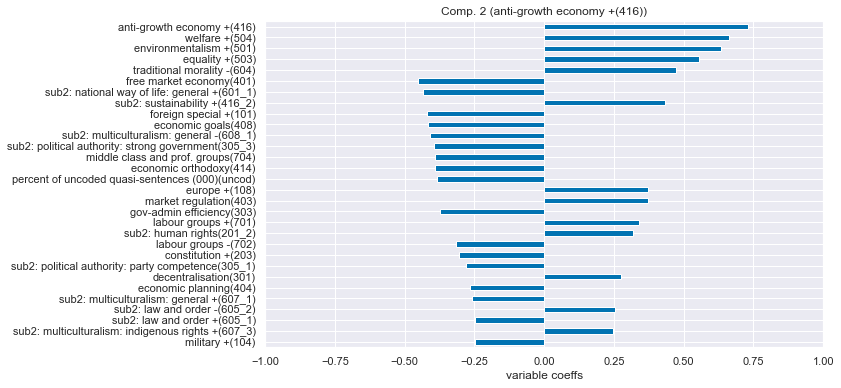

In [74]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)

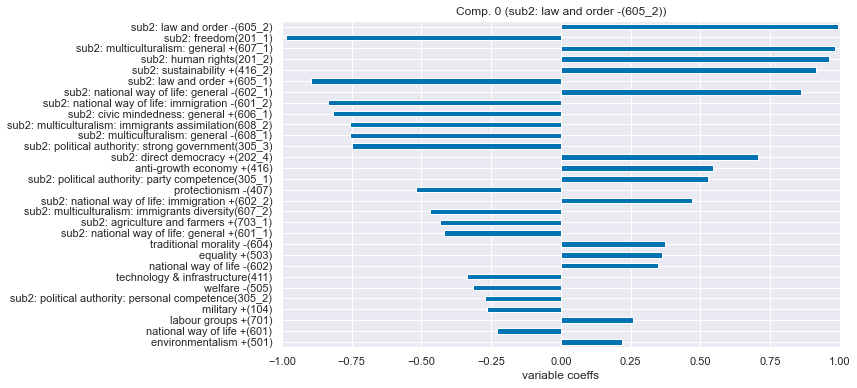

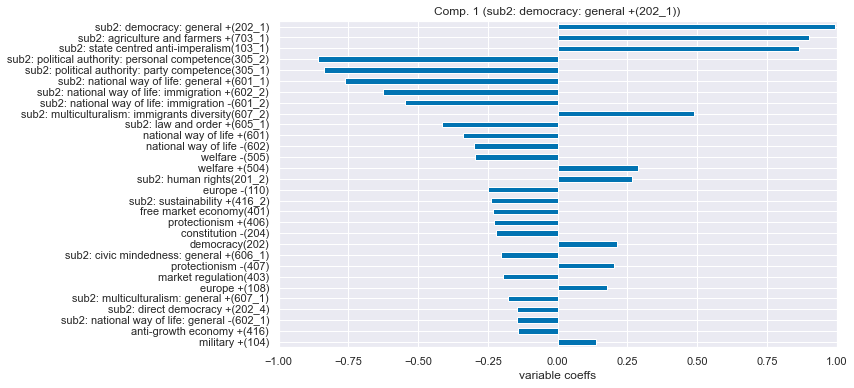

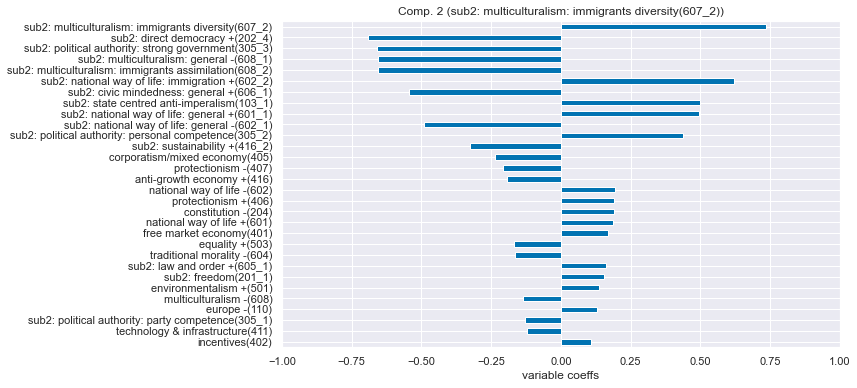

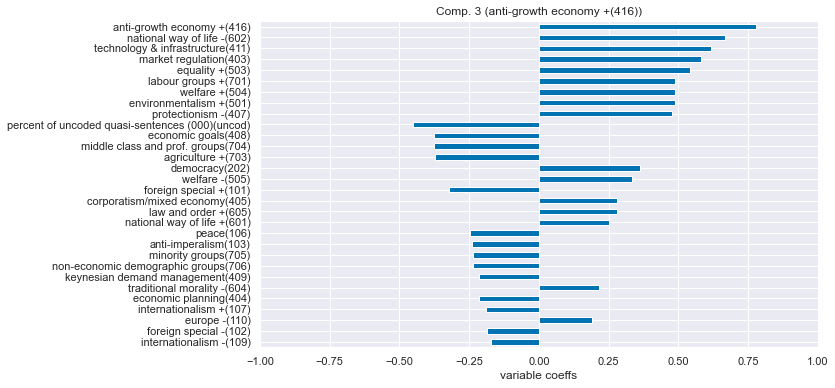

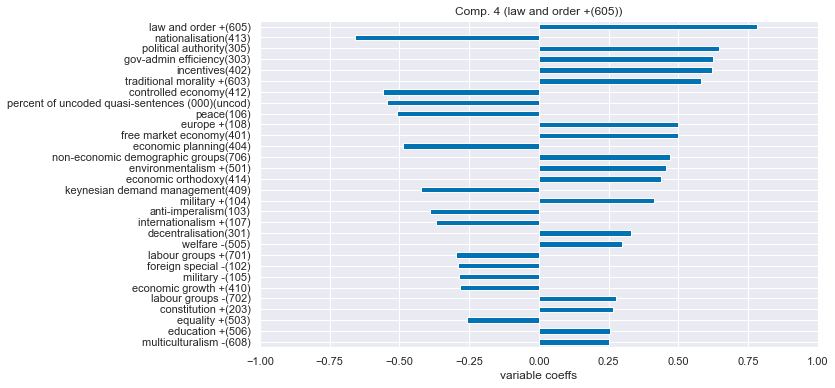

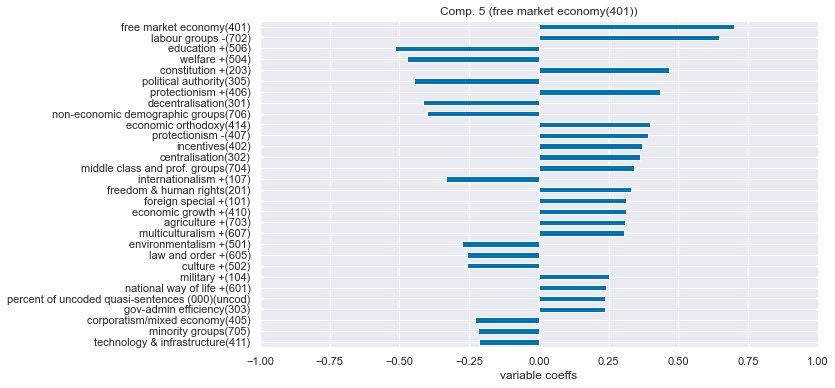

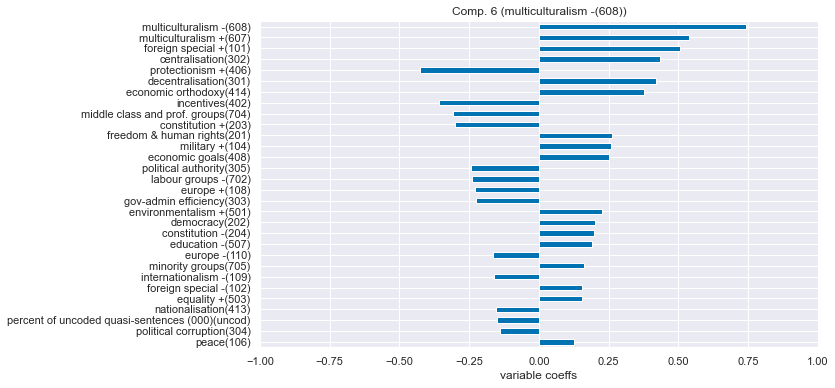

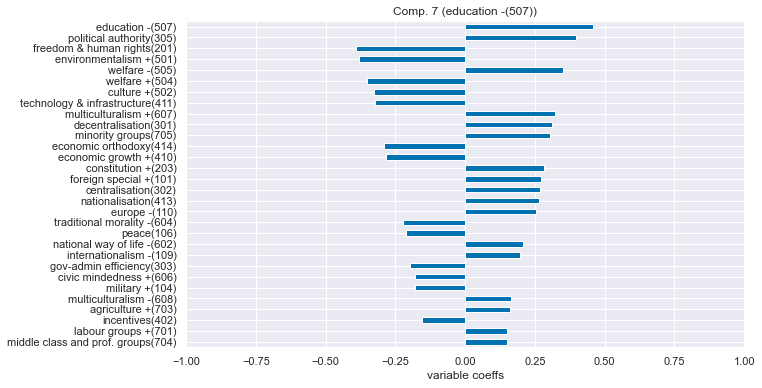

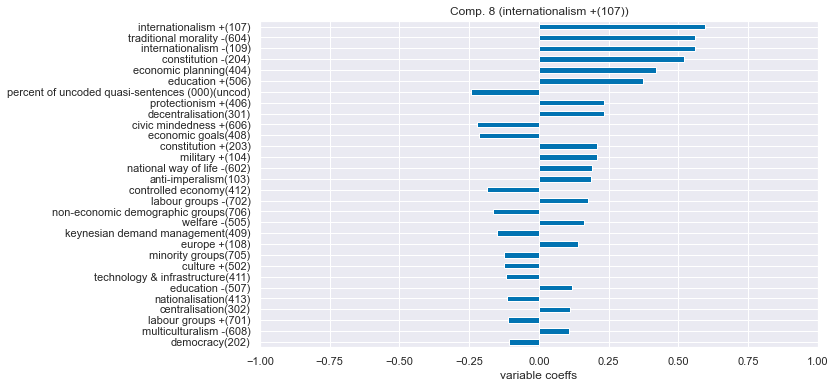

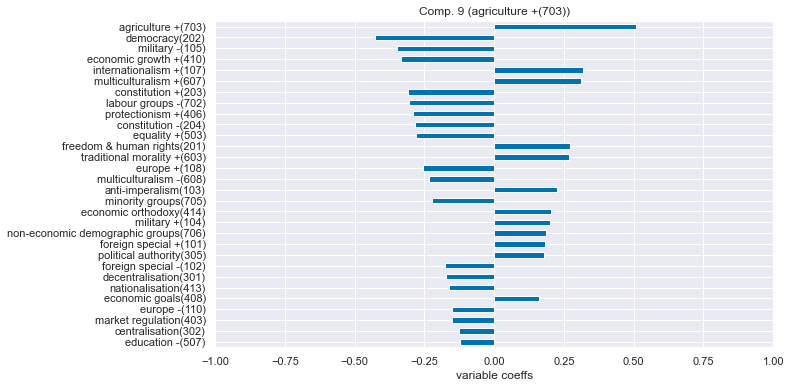

In [107]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 10, show_histogram = False)

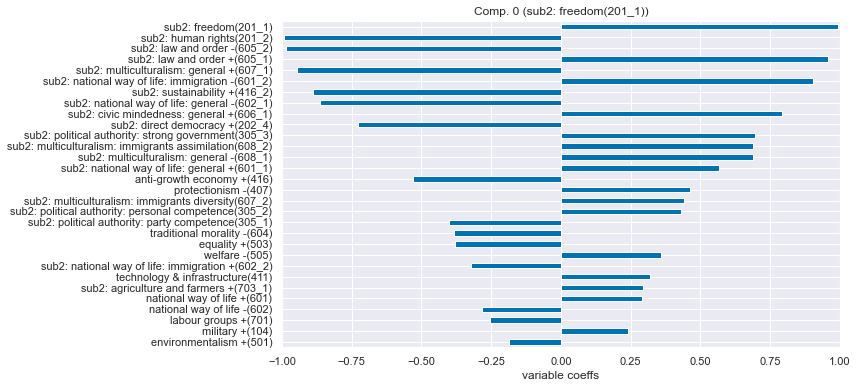

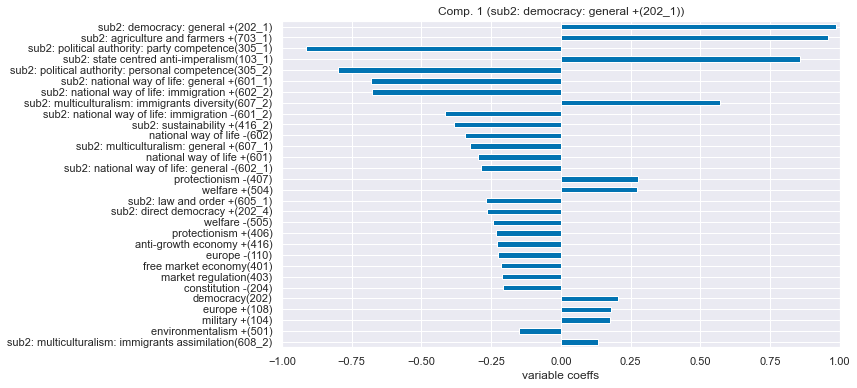

In [110]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)

Wall time: 456 ms


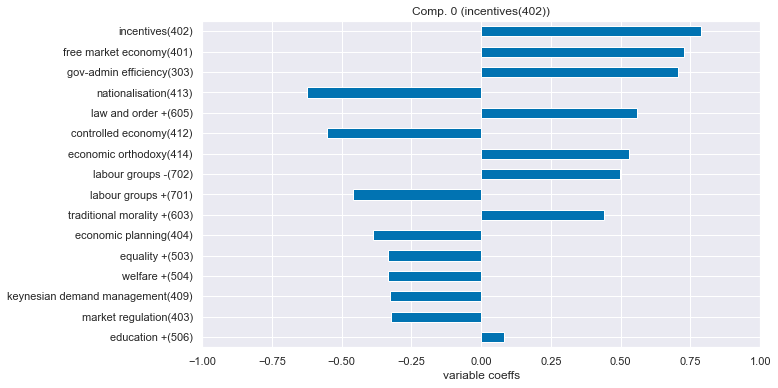

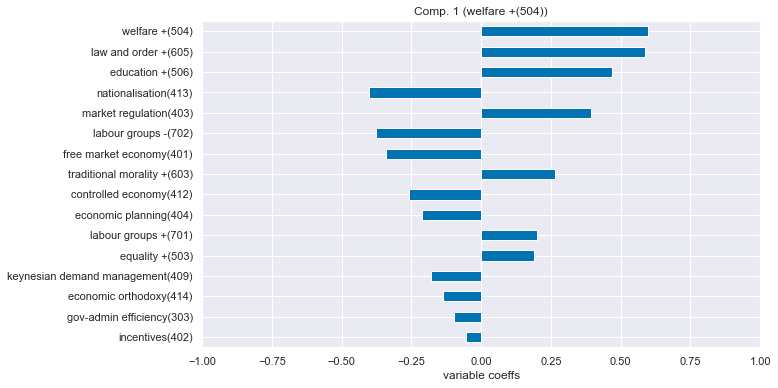

In [245]:
%%time
# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = decomp_std.shape[1]
n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=1.5,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(decomp_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = decomp_index)


(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)

In [224]:
low_noise_dict = {x:x.split("(")[1].split(")")[0] for x in pd.Series(decomp.noise_variance_,index = decomp_std.columns).sort_values().head(30).index}

Module created for script run in IPython
best n_components by PCA CV = 5
best n_components by FactorAnalysis CV = 5
best n_components by PCA MLE = 5
best n_components by PCA CV = 18
best n_components by FactorAnalysis CV = 5
best n_components by PCA MLE = 17
best n_components by PCA CV = 3
best n_components by FactorAnalysis CV = 0
best n_components by PCA MLE = 3


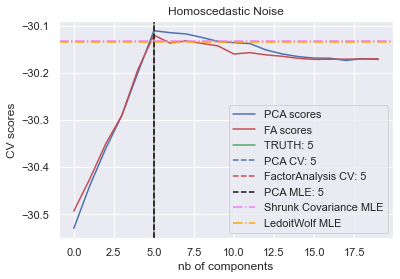

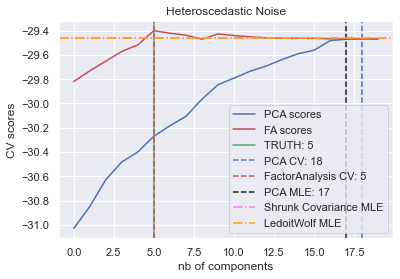

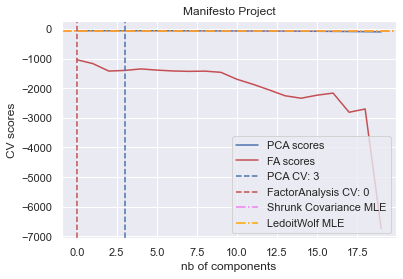

Wall time: 13.9 s


In [202]:
%%time
# Authors: Alexandre Gramfort
#          Denis A. Engemann
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print(__doc__)

# #############################################################################
# Create the data

n_samples, n_features, rank = 1000, 20, 5
sigma = 1.
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# Adding homoscedastic noise
X_homo = X + sigma * rng.randn(n_samples, n_features)

# Adding heteroscedastic noise
sigmas = sigma * rng.rand(n_features) + sigma / 2.
X_hetero = X + rng.randn(n_samples, n_features) * sigmas

# #############################################################################
# Fit the models

n_components = np.arange(0, n_features, 1)  # options for n_components


def compute_scores(X):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    return pca_scores, fa_scores


def shrunk_cov_score(X):
    shrinkages = np.logspace(-2, 0, 30)
    cv = GridSearchCV(ShrunkCovariance(), {'shrinkage': shrinkages})
    return np.mean(cross_val_score(cv.fit(X).best_estimator_, X))


def lw_score(X):
    return np.mean(cross_val_score(LedoitWolf(), X))


decomp_index = MCP_vals.index
decomp_columns = MCP_vals.columns
clean_feature_set_std = StandardScaler().fit_transform(MCP_vals.values )
decomp_std = pd.DataFrame(   clean_feature_set_std,
                             columns = MCP_vals.columns,
                             index   = MCP_vals.index      )


for X, title in [(X_homo, 'Homoscedastic Noise'),
                 (X_hetero, 'Heteroscedastic Noise'),
                 (decomp_std.values, 'Manifesto Project')]:
    pca_scores, fa_scores = compute_scores(X)
    n_components_pca = n_components[np.argmax(pca_scores)]
    n_components_fa = n_components[np.argmax(fa_scores)]

    pca = PCA(svd_solver='full', n_components='mle')
    pca.fit(X)
    n_components_pca_mle = pca.n_components_

    print("best n_components by PCA CV = %d" % n_components_pca)
    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
    print("best n_components by PCA MLE = %d" % n_components_pca_mle)

    plt.figure()
    plt.plot(n_components, pca_scores, 'b', label='PCA scores')
    plt.plot(n_components, fa_scores, 'r', label='FA scores')
    if title in [ 'Homoscedastic Noise','Heteroscedastic Noise']:
        plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
    plt.axvline(n_components_pca, color='b',
                label='PCA CV: %d' % n_components_pca, linestyle='--')
    plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa,
                linestyle='--')
    if title in [ 'Homoscedastic Noise','Heteroscedastic Noise']:    
        plt.axvline(n_components_pca_mle, color='k',
                label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

    # compare with other covariance estimators
    plt.axhline(shrunk_cov_score(X), color='violet',
                label='Shrunk Covariance MLE', linestyle='-.')
    plt.axhline(lw_score(X), color='orange',
                label='LedoitWolf MLE' % n_components_pca_mle, linestyle='-.')

    plt.xlabel('nb of components')
    plt.ylabel('CV scores')
    plt.legend(loc='lower right')
    plt.title(title)

plt.show()

In [203]:
# MCP_vals.var().value_counts().sort_index()

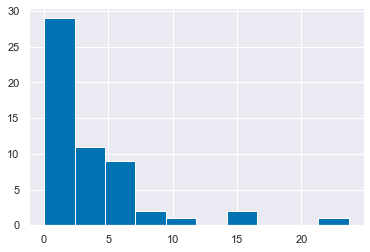

In [196]:
MCP_vals.var().hist()